In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


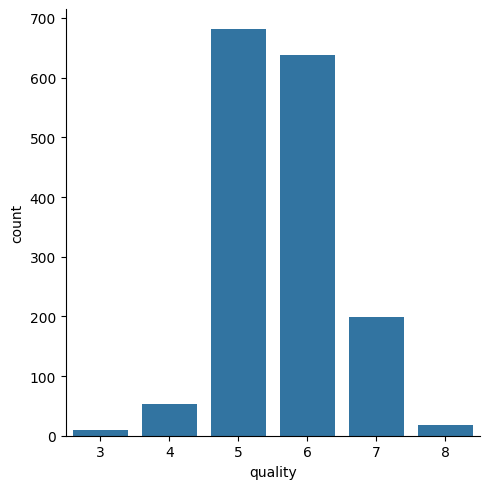

In [5]:
# number of values for each quality
sns.catplot(x='quality', data=df , kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

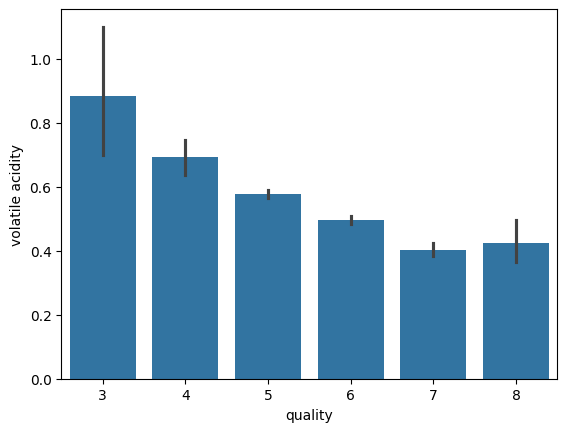

In [6]:
# Volatile acidity vs Quality
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

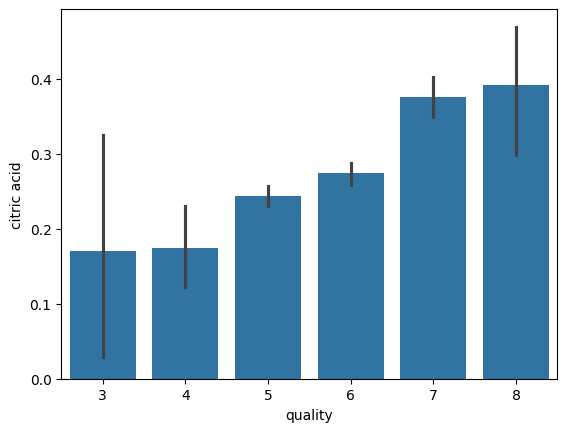

In [7]:
# Citric acid vs Quality
sns.barplot(x='quality', y='citric acid', data=df)

<Axes: >

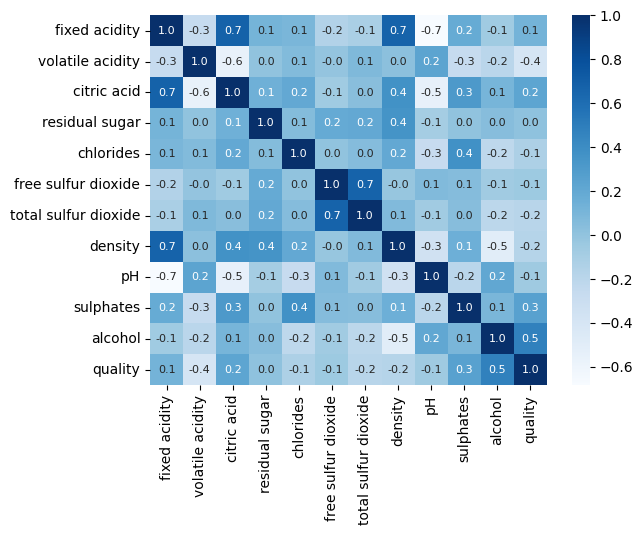

In [8]:
df_cor = df.corr()

sns.heatmap(df_cor, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
X = df.drop('quality', axis=1)
y = df.quality.apply (lambda y : 1 if y >= 7 else 0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2023)

# Using sklearn

In [11]:
model = RandomForestClassifier().fit(X_train, y_train)

In [12]:
print("Accuracy on train data: ", accuracy_score(model.predict(X_train), y_train))

Accuracy on train data:  1.0


In [13]:
print("Accuracy on test data: ", accuracy_score(model.predict(X_test), y_test))

Accuracy on test data:  0.875


# Using tensorflow

In [14]:
import tensorflow as tf
import keras
from keras import layers

In [15]:
normalizer = layers.Normalization()
normalizer.adapt(X_train)

# Create a model that include the normalization layer
inputs = keras.Input(shape=11)
x = normalizer(inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs, outputs)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=75)

Epoch 1/75
40/40 [==============================] - 1s 3ms/step - loss: 0.3562 - accuracy: 0.8749
Epoch 2/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.8835
Epoch 3/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.8890
Epoch 4/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.8890
Epoch 5/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.8984
Epoch 6/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.9030
Epoch 7/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9046
Epoch 8/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 0.8944
Epoch 9/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9077
Epoch 10/75
40/40 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9116
Epoch 11/75
40/40 [

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

10/10 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.8875
Accuracy: 88.75
